# High-frequency Radar observations of surface currents

HF radar is amazing! With the right configuration of radars you can get ocean surface velocity over a broad area, at high spatial and temporal resolution. There is an extensive (and growing) network of these radar around the world. 

In the US the data is aggregated and dististributed by the National HFRADAR Network: http://cordc.ucsd.edu/projects/mapping/ and hosted at the Coastal Observing Research and Development Center Scripps Institution of Oceanography (https://cordc.ucsd.edu/).

Data are available via THREDDS for 5 regions at https://hfrnet-tds.ucsd.edu/thredds/catalog.html:
* US West Coast : 
* US East and Gulf Coast
* US Hawai'i State
* Alaska, North Slope
* Puerto Rico and the US Virgin Islands

Data is available for each region at different spatial and temporal resolutions (resulting from different radar frequencies and data processing steps).

Lots of detailed information is available from the github page for the Radiowave Operators Working Group: https://github.com/rowg, and from IOOS: https://ioos.noaa.gov/project/hf-radar/





In [15]:
# imports

import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

# links for the 6km hourly data for the 5 regions are below:

In [2]:
url_USwest_6km = 'http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/6km/hourly/RTV/HFRADAR_US_West_Coast_6km_Resolution_Hourly_RTV_best.ncd'
url_USeast_6km = 'http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USEGC/6km/hourly/RTV/HFRADAR_US_East_and_Gulf_Coast_6km_Resolution_Hourly_RTV_best.ncd'
url_alaska_6km = 'http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/AKNS/6km/hourly/RTV/HFRADAR_Alaska_-_North_Slope_6km_Resolution_Hourly_RTV_best.ncd'
url_hawaii_6km = 'http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USHI/6km/hourly/RTV/HFRADAR_US_Hawaii_6km_Resolution_Hourly_RTV_best.ncd'
url_puerto_rico_6km = 'http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/PRVI/6km/hourly/RTV/HFRADAR_Puerto_Rico_and_the_US_Virgin_Islands_6km_Resolution_Hourly_RTV_best.ncd'



# Load data from a region

xarray uses lazy-loading, so this will just load the metadata. We will want to select a smaller time or space region so that the files aren't so huge. 

check the size of the data with the line: 

```python

print('data size:',ds.nbytes/1e6, 'MB')
```



In [3]:
ds = xr.open_dataset(url_USeast_6km)

print('data size:',ds.nbytes/1e6, 'MB')

ds

data size: 357019.064416 MB


<xarray.Dataset>
Dimensions:       (lat: 460, lon: 701, nProcParam: 7, nSites: 42, time: 69198)
Coordinates:
  * lat           (lat) float32 21.73596 21.7899 21.84384 ... 46.44048 46.49442
  * lon           (lon) float32 -97.88385 -97.825775 ... -57.289284 -57.23121
  * time          (time) datetime64[ns] 2012-01-01 ... 2019-11-25T14:00:00
    time_run      (time) datetime64[ns] ...
Dimensions without coordinates: nProcParam, nSites
Data variables:
    site_lat      (nSites) float32 ...
    site_lon      (nSites) float32 ...
    site_code     (nSites) |S64 ...
    site_netCode  (nSites) |S64 ...
    procParams    (nProcParam) float32 ...
    time_offset   (time) datetime64[ns] ...
    u             (time, lat, lon) float32 ...
    v             (time, lat, lon) float32 ...
    DOPx          (time, lat, lon) float32 ...
    DOPy          (time, lat, lon) float32 ...
Attributes:
    netcdf_library_version:  4.1.3
    format_version:          HFRNet_1.0.0
    product_version:         HFRN

# select a subset of the data:
# Mid-Atlantic Bight

Here I will grab the midatlantic region
```python
MAB = ds.___(lat = slice() , lon = ___(__,__))

```

then grab a particular time below

```python 
MAB = MAB.sel( time = '____', method='nearest')
```



In [10]:

MAB = ds.sel(lat = slice(36.6, 41.5) , lon = slice(-76.6,  -66.1))
MAB = MAB.sel( time = '2019-11-21 12:00', method='nearest')

print('data size:',MAB.nbytes/1e6, 'MB')
MAB



data size: 0.270388 MB


<xarray.Dataset>
Dimensions:       (lat: 91, lon: 181, nProcParam: 7, nSites: 42)
Coordinates:
  * lat           (lat) float32 36.6234 36.67734 36.73128 ... 41.42406 41.478
  * lon           (lon) float32 -76.57025 -76.51218 ... -66.17479 -66.116714
    time          datetime64[ns] 2019-11-21T12:00:00
    time_run      datetime64[ns] ...
Dimensions without coordinates: nProcParam, nSites
Data variables:
    site_lat      (nSites) float32 ...
    site_lon      (nSites) float32 ...
    site_code     (nSites) |S64 ...
    site_netCode  (nSites) |S64 ...
    procParams    (nProcParam) float32 ...
    time_offset   datetime64[ns] ...
    u             (lat, lon) float32 ...
    v             (lat, lon) float32 ...
    DOPx          (lat, lon) float32 ...
    DOPy          (lat, lon) float32 ...
Attributes:
    netcdf_library_version:  4.1.3
    format_version:          HFRNet_1.0.0
    product_version:         HFRNet_1.1.05
    Conventions:             CF-1.4
    title:                   Ne

# make a map

Use the `plt.quiver()` plotting type. `plt.quiver()` doesn't like when you give it `xarray` datasets, so you need to save each input to the plot as a numpy array first. We can strip away all the nice xarray metadata from a variable by calling `.values` on the variable. 

So, along with the projection set up, the quiver plot part is going to look something like this:

```python
lat = MAB.lat[::data_step].values
lon = MAB.lon[::data_step].values
u = MAB.u[::data_step, ::data_step].values
v = MAB.v[::data_step, ::data_step].values

spd = (u**2 + v**2)**0.5

Q = ax.quiver(lon, lat, u, v,  spd, transform=data_crs)
```

where I have also subset the data using the `data_step` variable, just a number that takes just a portion of the data. Helps sometimes with seeing all the velocity vectors. 

/Users/beaird/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/beaird/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1752: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


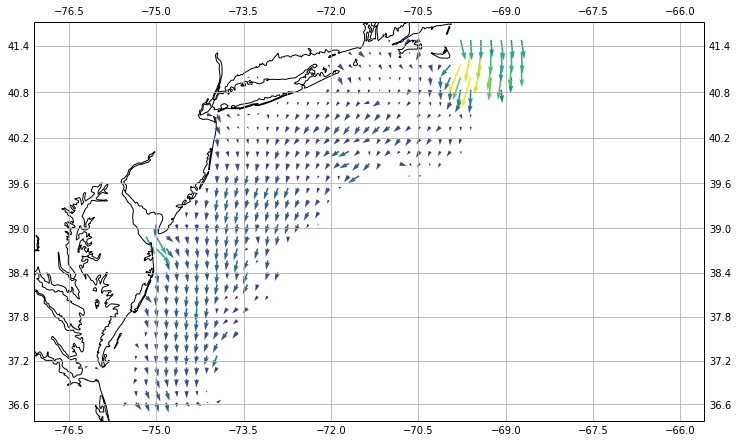

In [11]:
data_crs = ccrs.PlateCarree()
projection = ccrs.Mercator()

plt.figure(figsize=(12,12))
ax = plt.axes(projection=projection)

# might want to subset the data
data_step = 3

lat = MAB.lat[::data_step].values
lon = MAB.lon[::data_step].values
u = MAB.u[::data_step, ::data_step].values
v = MAB.v[::data_step, ::data_step].values
spd = (u**2 + v**2)**0.5

Q = ax.quiver(lon, lat, u, v,  spd, transform=data_crs)
# ax.quiverkey(Q, -72.0, 37.8, 0.5, '0.5 m/s', color='k', transform=data_crs)

ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)
# ax.grid()
# ax[0].set_extent([-159, -154, 70.8, 72.0])

# look at a timeseries

start by taking a time slice of the full dataset:

In [12]:

ds_timeseries = ds.sel(time=slice('2019-11-15', '2019-11-20'))

print('data size:',ds_timeseries.nbytes/1e6, 'MB')

ds_timeseries

data size: 742.96168 MB


<xarray.Dataset>
Dimensions:       (lat: 460, lon: 701, nProcParam: 7, nSites: 42, time: 144)
Coordinates:
  * lat           (lat) float32 21.73596 21.7899 21.84384 ... 46.44048 46.49442
  * lon           (lon) float32 -97.88385 -97.825775 ... -57.289284 -57.23121
  * time          (time) datetime64[ns] 2019-11-15 ... 2019-11-20T23:00:00
    time_run      (time) datetime64[ns] ...
Dimensions without coordinates: nProcParam, nSites
Data variables:
    site_lat      (nSites) float32 ...
    site_lon      (nSites) float32 ...
    site_code     (nSites) |S64 ...
    site_netCode  (nSites) |S64 ...
    procParams    (nProcParam) float32 ...
    time_offset   (time) datetime64[ns] ...
    u             (time, lat, lon) float32 ...
    v             (time, lat, lon) float32 ...
    DOPx          (time, lat, lon) float32 ...
    DOPy          (time, lat, lon) float32 ...
Attributes:
    netcdf_library_version:  4.1.3
    format_version:          HFRNet_1.0.0
    product_version:         HFRNet

### then select a point 
use `.sel(__, ___ , method='___' )`

In [13]:
point = ds_timeseries.sel(lat=39.6, lon=-73.5, method='nearest')

print('point size:', point.nbytes/1e6)

point

point size: 0.011508


<xarray.Dataset>
Dimensions:       (nProcParam: 7, nSites: 42, time: 144)
Coordinates:
    lat           float32 39.5901
    lon           float32 -73.49226
  * time          (time) datetime64[ns] 2019-11-15 ... 2019-11-20T23:00:00
    time_run      (time) datetime64[ns] ...
Dimensions without coordinates: nProcParam, nSites
Data variables:
    site_lat      (nSites) float32 ...
    site_lon      (nSites) float32 ...
    site_code     (nSites) |S64 ...
    site_netCode  (nSites) |S64 ...
    procParams    (nProcParam) float32 ...
    time_offset   (time) datetime64[ns] ...
    u             (time) float32 ...
    v             (time) float32 ...
    DOPx          (time) float32 ...
    DOPy          (time) float32 ...
Attributes:
    netcdf_library_version:  4.1.3
    format_version:          HFRNet_1.0.0
    product_version:         HFRNet_1.1.05
    Conventions:             CF-1.4
    title:                   Near-Real Time Surface Ocean Velocity, U.S. East...
    institution:       

### and now make your timeseries plot

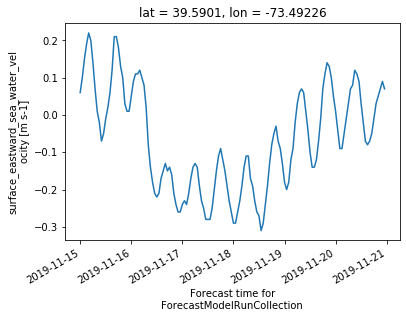

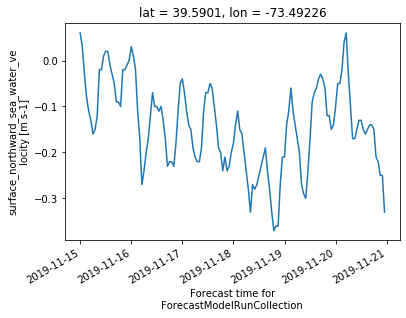

In [16]:
# plt.plot(point.time, point.u)
plt.figure()
point.u.plot()

plt.figure()
point.v.plot()